<a href="https://colab.research.google.com/github/Trace-Zero/Simulated-dataset-HToAATo2Mu2B/blob/main/MS_Collaboration_(2024)_Simulated_dataset_HToAATo2Mu2B_MA25_TuneCP5_13TeV_madgraph_pythia8_in_NANOAODSIM_format_for_2016_collision_open_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install uproot awkward hist


In [ ]:
!pip install --upgrade uproot awkward hist requests urllib3



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.8/64.8 kB 1.8 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.32.3
    Uninstalling requests-2.32.3:
      Successfully uninstalled requests-2.32.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.32.3, but you have requests 2.32.4 which is incompatible.


In [ ]:
import uproot
import awkward as ak
import matplotlib.pyplot as plt
import numpy as np
import hist
import urllib3
import requests
import io

In [ ]:
url_signal = "https://eospublic.cern.ch/eos/opendata/cms/mc/RunIISummer20UL16NanoAODv9/HToAATo2Mu2B-MA25_TuneCP5_13TeV-madgraph-pythia8/NANOAODSIM/106X_mcRun2_asymptotic_v17-v1/2560000/FC3D450A-CEBF-6342-9526-CAE7BDFB401A.root"


In [ ]:
response = requests.get(url_signal, verify=False)

/usr/local/lib/python3.11/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'eospublic.cern.ch'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


In [ ]:
#eksik dosya var mı kontrol için.
if response.status_code != 200:
  raise Exception(f"Failed to download file. Status code: {response.status_code}")


In [ ]:
file_like = io.BytesIO(response.content)

In [ ]:
file = uproot.open(file_like)
tree = file["Events"]

print("Event number:", tree.num_entries)

Event number: 200000


In [ ]:
tree.show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
run                  | uint32_t                 | AsDtype('>u4')
luminosityBlock      | uint32_t                 | AsDtype('>u4')
event                | uint64_t                 | AsDtype('>u8')
HTXS_Higgs_pt        | float                    | AsDtype('>f4')
HTXS_Higgs_y         | float                    | AsDtype('>f4')
HTXS_stage1_1_cat... | int32_t                  | AsDtype('>i4')
HTXS_stage1_1_cat... | int32_t                  | AsDtype('>i4')
HTXS_stage1_1_fin... | int32_t                  | AsDtype('>i4')
HTXS_stage1_1_fin... | int32_t                  | AsDtype('>i4')
HTXS_stage1_2_cat... | int32_t                  | AsDtype('>i4')
HTXS_stage1_2_cat... | int32_t                  | AsDtype('>i4')
HTXS_stage1_2_fin... | int32_t                  | AsDtype('>i4')
HTXS_stage1_2_fin... | int32_t                  | AsDtype(

In [ ]:
branches = ["Muon_pt", "Muon_eta", "Muon_phi", "Muon_mass", "Muon_charge", "Jet_pt", "Jet_eta", "Jet_mass"]

In [ ]:
arrays = tree.arrays(branches)

In [ ]:
def pyplot_histogram(array, name, bins=50, xlabel="", ylabel="", density=False ):
  plt.hist(ak.flatten(array), bins=bins, histtype="step", label=name)
  plt.xlabel(xlabel if xlabel else name)
  plt.ylabel(ylabel if ylabel else "Event Count")
  plt.title(name + " Histogram")
  plt.grid(True)
  plt.legend()
  plt.show()


In [ ]:
muon_pt_all = (arrays["Muon_pt"])
muon_pt_cut = muon_pt_all[(muon_pt_all > 0) & (muon_pt_all < 81)]

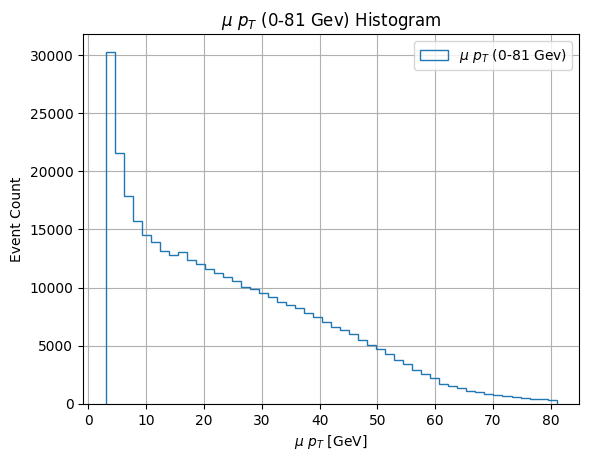

In [ ]:
pyplot_histogram(muon_pt_cut, r"$\mu$ $p_T$ (0-81 Gev)", bins=50, xlabel=r"$\mu$ $p_T$ [GeV]",)



In [ ]:
muon_eta_all = (arrays["Muon_eta"])
muon_eta_cut = muon_eta_all[(muon_eta_all > -3) & (muon_eta_all < 3)]

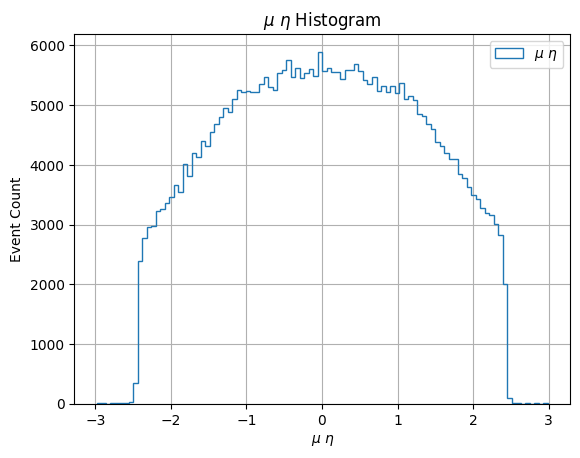

In [ ]:
pyplot_histogram(muon_eta_cut, r"$\mu$ $\eta$", bins=100, xlabel="$\mu$ $\eta$")

In [ ]:
muon_phi_all = (arrays["Muon_phi"])
muon_phi_cut = muon_phi_all[(muon_phi_all > -3.2) & (muon_phi_all < 3.2)]

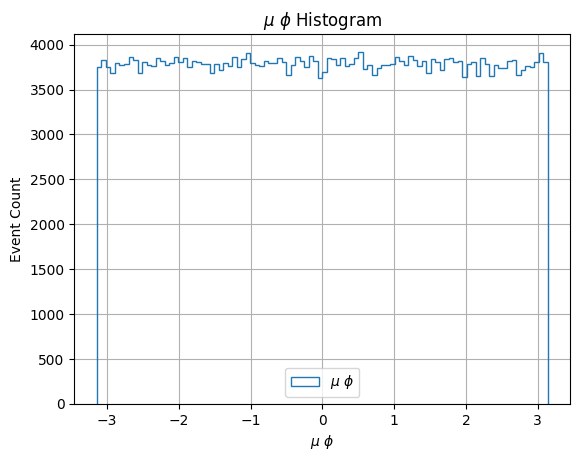

In [ ]:
pyplot_histogram(muon_phi_cut, r"$\mu$ $\phi$", bins=100, xlabel="$\mu$ $\phi$")


In [ ]:
muon_mass_all = (arrays["Muon_mass"])
muon_mass_cut = muon_mass_all[(muon_mass_all > 0.1056) & (muon_mass_all < 4)]

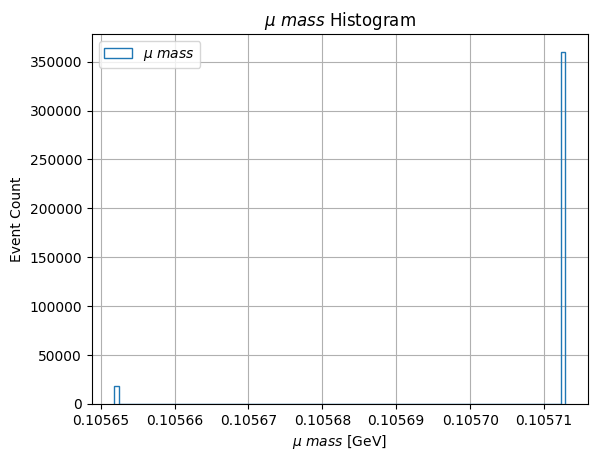

In [ ]:
pyplot_histogram(muon_mass_cut, r"$\mu$ $mass$", bins=100, xlabel="$\mu$ $mass$ [GeV]")

In [ ]:
#muon_charge_all = (arrays["Muon_charge"])
#muon_charge_cut = muon_charge_all[(muon_charge_all > 0) & (muon_charge_all < 1)]

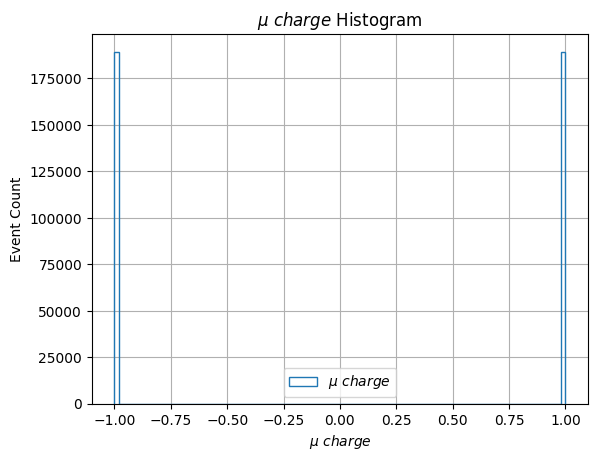

In [ ]:
pyplot_histogram(arrays["Muon_charge"], "$\mu$ $charge$", bins=100, xlabel="$\mu$ $charge$")

In [ ]:
jet_pt_all = (arrays["Jet_pt"])
jet_pt_cut = jet_pt_all[(jet_pt_all > 0) & (jet_pt_all < 175)]

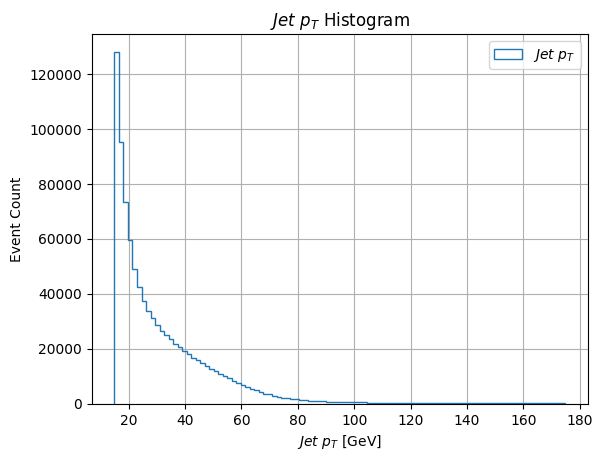

In [ ]:
pyplot_histogram(jet_pt_cut, "$Jet$ $p_{T}$", bins=100, xlabel="$Jet$ $p_{T}$ [GeV]")

In [ ]:
jet_eta_all = (arrays["Jet_eta"])
jet_eta_cut = jet_eta_all[(jet_eta_all > -4.5) & (jet_eta_all < 4.5)]

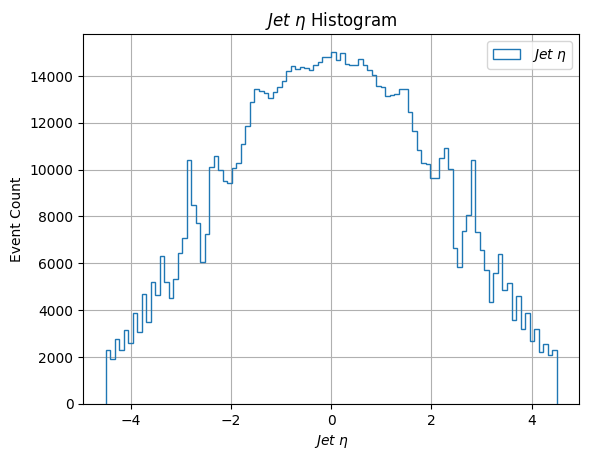

In [ ]:
pyplot_histogram(jet_eta_cut, "$Jet$ $\eta$", bins=100, xlabel="$Jet$ $\eta$")

In [ ]:
jet_mass_all = (arrays["Jet_mass"])
jet_mass_cut = jet_mass_all[(jet_mass_all > 0) & (jet_mass_all < 35)]

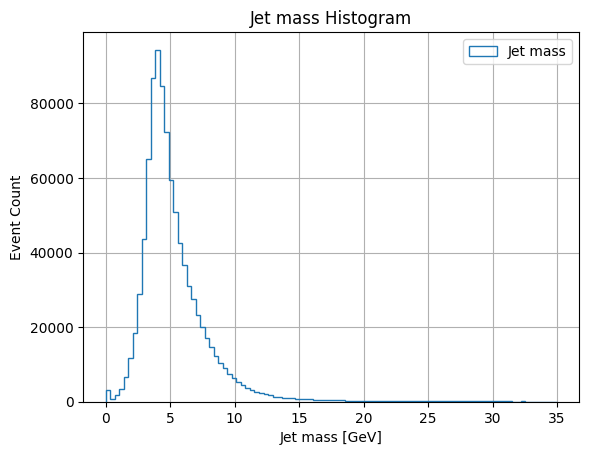

In [ ]:
pyplot_histogram(jet_mass_cut, "Jet mass", bins=100, xlabel="Jet mass [GeV]")

In [ ]:

#pyplot_histogram(arrays["Muon_phi"], "Muon #phi", bins=100, xlabel="Muon #phi")
#pyplot_histogram(arrays["Muon_mass"], "Muon mass", bins=100, xlabel="Muon mass [GeV]")
#pyplot_histogram(arrays["Muon_charge"], "Muon charge", bins=100, xlabel="Muon charge")
#pyplot_histogram(arrays["Jet_pt"], "Jet p_{T}", bins=100, xlabel="Jet p_{T} [GeV]")
#pyplot_histogram(arrays["Jet_eta"], "Jet #eta", bins=100, xlabel="Jet #eta")
#pyplot_histogram(arrays["Jet_mass"], "Jet mass", bins=100, xlabel="Jet mass [GeV]")